**Name of the Student**    : Rebecca Dias                                     <br>   **Rollno** :     19                                                 <br>               **PID**: 182027









**1. Distance metrics**

Implement the different distance metrics
1. Jaccard distance


In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
x=np.array([0,1,1])
y=np.array([1,1,1])
z=jaccard_score(x,y)
z1=1-z
print("The Jaccard similarity between X and Y" +str(z))
print("The Jaccard distance between X and Y" +str(z1))

The Jaccard similarity between X and Y0.6666666666666666
The Jaccard distance between X and Y0.33333333333333337


2. cosine distance


In [ ]:
from scipy import spatial

datasetI=[3,45,7,2]
datasetII=[2,54,13,19]
result=1-spatial.distance.cosine(datasetI,datasetII)
print("The cosine distance is" +str(result))

The cosine distance is0.9559091030465309


3. Euclidean distance


In [ ]:
import math
print("Enter first point A")
x1,y1=map(int,input().split())
print("Enter second point B")
x2,y2=map(int,input().split())
dist=math.sqrt((x2-x1)**2+(y2-y1)**2)
print("The Euclidean Distance is" +str(dist))

Enter first point A
4 3
Enter second point B
2 2
The Euclidean Distance is2.23606797749979


4. Manhattan distance
 

In [ ]:
import math
print("Enter first point A")
x1,y1=map(int,input().split())
print("Enter second point B")
x2,y2=map(int,input().split())
dist=abs(x2-x1)+abs(y2-y1)
print("The Manhattan Distance is" +str(dist))

Enter first point A
23 45
Enter second point B
222 555
The Manhattan Distance is709


5. Edit distance

In [ ]:
def edit_distance(string1, string2):
    """Ref: https://bit.ly/2Pf4a6Z"""

    if len(string1) > len(string2):
        difference = len(string1) - len(string2)
        string1[:difference]

    elif len(string2) > len(string1):
        difference = len(string2) - len(string1)
        string2[:difference]

    else:
        difference = 0

    for i in range(len(string1)):
        if string1[i] != string2[i]:
            difference += 1

    return difference

print(edit_distance("kitten", "sitting"))
print(edit_distance("sarah", "rebecca"))
print(edit_distance("defghsi", "abcceghi"))

3
7
8


**Why is PYspark used for clustering?** <br>
Ans: PySpark uses the concept of Data Parallelism or Result Parallelism when performing the K Means clustering.K-means is one of the most commonly used clustering algorithms for grouping data into a predefined number of clusters. The spark. mllib includes a parallelized variant of the k-means++ method called kmeans||. The KMeans function from pyspark.k is the number of clusters specified by the user.

**What are some major Applications using Pyspark in Clustering?** <br> 
Ans:Applications of Clustering in different fields  

 

*   Marketing: It can be used to characterize & discover customer segments for marketing purposes.
*   Biology: It can be used for classification among different species of plants and animals.

*   Libraries: It is used in clustering different books on the basis of topics and information.
*   Insurance: It is used to acknowledge the customers, their policies and identifying the frauds.

## **2. Implementation:** 

**1.Setting up Pyspark in Colab**
a. The first step is to download java. 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

In [ ]:
mv spark-3.1.2-bin-hadoop3.2.tgz spark3.tgz

In [ ]:
!tar xf spark3.tgz
!pip install -q findspark

In [ ]:
!pip install -q findspark

Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

Pyspark is located and initiated in your system by using these two commands

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.2-bin-hadoop3.2'

we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Clustering using K-Means").getOrCreate()

Finally, print the SparkSession variable.

In [ ]:
spark

If you have completed so far, you are ready to move forward with Pyspark


**Loading Data into Pyspark**

*`A sample is shown here which is done using CC General dataset. YOu may try the same and execute for some other dataset which can be downloaded from kaggle or UCI repository `*

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Live_20210128.csv to Live_20210128.csv


**Viewing the Schema**

In [ ]:
facebook=spark.read.csv('/content/Live_20210128.csv', header=True, inferSchema=True)
facebook.printSchema()

root
 |-- status_id: integer (nullable = true)
 |-- num_reactions: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_shares: integer (nullable = true)
 |-- num_likes: integer (nullable = true)
 |-- num_loves: integer (nullable = true)
 |-- num_wows: integer (nullable = true)
 |-- num_hahas: integer (nullable = true)
 |-- num_sads: integer (nullable = true)
 |-- num_angrys: integer (nullable = true)



**What are the broader classification of the attributes ?** <br> The broadest data types are alphanumeric and numeric. Programming languages allow for the creation of several data types, such as integer (whole numbers), floating point, date, string (text), logical (true/false) and binary.

Why the comment below is used?<br> It is used to remove/discard the NULL values

In [ ]:
facebook=facebook.na.drop()

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
cols=facebook.columns

In [ ]:
cols

['status_id',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [ ]:
assemble=VectorAssembler(inputCols=cols, outputCol='features')

Why is a Vector Assembler used here? <br> Vector Assembler is a feature transformer that merges multiple columns into a vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees.

In [ ]:
assembled_data=assemble.transform(facebook)
assembled_data.show(2)

+---------+-------------+------------+----------+---------+---------+--------+---------+--------+----------+--------------------+
|status_id|num_reactions|num_comments|num_shares|num_likes|num_loves|num_wows|num_hahas|num_sads|num_angrys|            features|
+---------+-------------+------------+----------+---------+---------+--------+---------+--------+----------+--------------------+
|        1|          529|         512|       262|      432|       92|       3|        1|       1|         0|[1.0,529.0,512.0,...|
|        2|          150|           0|         0|      150|        0|       0|        0|       0|         0|(10,[0,1,4],[2.0,...|
+---------+-------------+------------+----------+---------+---------+--------+---------+--------+----------+--------------------+
only showing top 2 rows



**Standardizing the data to a comparable scale**

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scale=StandardScaler(inputCol='features',outputCol='standardized')

In [ ]:
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

In [ ]:
data_scale_output.show(5)

+---------+-------------+------------+----------+---------+---------+--------+---------+--------+----------+--------------------+--------------------+
|status_id|num_reactions|num_comments|num_shares|num_likes|num_loves|num_wows|num_hahas|num_sads|num_angrys|            features|        standardized|
+---------+-------------+------------+----------+---------+---------+--------+---------+--------+----------+--------------------+--------------------+
|        1|          529|         512|       262|      432|       92|       3|        1|       1|         0|[1.0,529.0,512.0,...|[4.91327086568131...|
|        2|          150|           0|         0|      150|        0|       0|        0|       0|         0|(10,[0,1,4],[2.0,...|(10,[0,1,4],[9.82...|
|        3|          227|         236|        57|      204|       21|       1|        1|       0|         0|[3.0,227.0,236.0,...|[0.00147398125970...|
|        4|          111|           0|         0|      111|        0|       0|        0|      

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.8856384084184857
Silhouette Score: 0.7970871123069208
Silhouette Score: 0.4132312447259981
Silhouette Score: 0.800679877237448
Silhouette Score: 0.803613399248971
Silhouette Score: 0.45783325558245874
Silhouette Score: 0.7252538013376477
Silhouette Score: 0.7150091482778196


What is silehouette score? Why is it used? <br>
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Text(0, 0.5, 'cost')

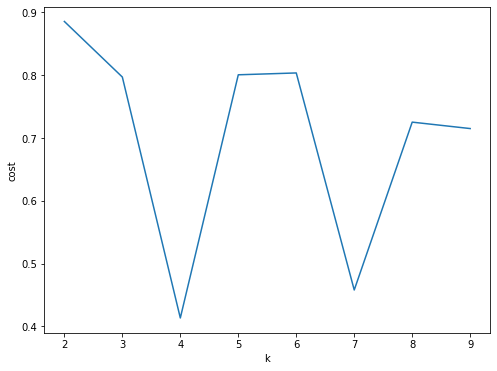

In [ ]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel("k")
ax.set_ylabel("cost")

In [ ]:
pddf_pred = output.toPandas().set_index('status_id')

In [ ]:
pddf_pred

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,features,standardized,prediction
status_id,,,,,,,,,,,,
1,529,512,262,432,92,3,1,1,0,"[1.0, 529.0, 512.0, 262.0, 432.0, 92.0, 3.0, 1...","[0.0004913270865681313, 1.1434739724656195, 0....",6
2,150,0,0,150,0,0,0,0,0,"(2.0, 150.0, 0.0, 0.0, 150.0, 0.0, 0.0, 0.0, 0...","(0.0009826541731362626, 0.32423647612446677, 0...",0
3,227,236,57,204,21,1,1,0,0,"[3.0, 227.0, 236.0, 57.0, 204.0, 21.0, 1.0, 1....","[0.001473981259704394, 0.49067786720169304, 0....",0
4,111,0,0,111,0,0,0,0,0,"(4.0, 111.0, 0.0, 0.0, 111.0, 0.0, 0.0, 0.0, 0...","(0.0019653083462725252, 0.2399349923321054, 0....",0
5,213,0,0,204,9,0,0,0,0,"(5.0, 213.0, 0.0, 0.0, 204.0, 9.0, 0.0, 0.0, 0...","(0.0024566354328406565, 0.4604157960967428, 0....",0
...,...,...,...,...,...,...,...,...,...,...,...,...
7046,89,0,0,89,0,0,0,0,0,"(7046.0, 89.0, 0.0, 0.0, 89.0, 0.0, 0.0, 0.0, ...","(3.4618906519590533, 0.19238030916718363, 0.0,...",0
7047,16,0,0,14,1,0,1,0,0,"(7047.0, 16.0, 0.0, 0.0, 14.0, 1.0, 0.0, 1.0, ...","(3.462381979045621, 0.03458522411994312, 0.0, ...",0
7048,2,0,0,1,1,0,0,0,0,"(7048.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0....","(3.4628733061321895, 0.00432315301499289, 0.0,...",0


In [ ]:
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')   
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)
output=KMeans_fit.transform(data_scale_output)
score=evaluator.evaluate(output)
silhouette_score.append(score)
print("Silhouette Score:",score)

Silhouette Score: 0.4132312447259981


In [ ]:
pddf_pred = output.toPandas().set_index('status_id')

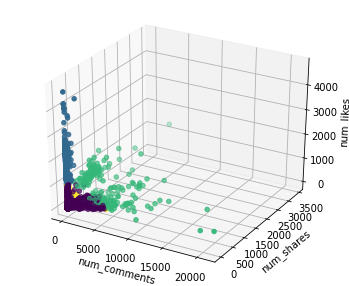

In [ ]:
threedee = plt.figure(figsize=(6,5)).gca(projection='3d')
threedee.scatter(pddf_pred.num_comments, pddf_pred.num_shares, pddf_pred.num_likes, c=pddf_pred.prediction)
threedee.set_xlabel('num_comments')
threedee.set_ylabel('num_shares')
threedee.set_zlabel('num_likes')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pddf_pred, pddf_pred.num_comments, pddf_pred.num_shares, pddf_pred.num_likes, color=pddf_pred.prediction,
                    title="3D Scatter Plot")
fig.show()

https://towardsdatascience.com/k-means-clustering-using-pyspark-on-big-data-6214beacdc8b <br>
**Conclusion** :- K-means can be implemented using scikit learn in python. PySpark uses the concept of Data Parallelism or Result Parallelism when performing the K Means clustering.PySpark gives a lot of compulational power which is extremely less than the number of iterations used in K-means by Scikit Learn.Hence in for data visualization in BDA PySpark has a greater edge.